# Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras import layers,optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K 
from IPython.display import display

Here is our dataset in csv file 

In [2]:
facialpoints_df = pd.read_csv('training.csv')

In [3]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [4]:
facialpoints_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
# conveting all the pixel values of the image into the matrix form of desired size

facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x , dtype = int , sep = ' ').reshape(96,96))

In [6]:
facialpoints_df['Image'][1].shape

(96, 96)

In [7]:
facialpoints_df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [8]:
len(facialpoints_df.iloc[:,1])

7049

In [9]:
# dropping the null values
facialpoints_df =  facialpoints_df.dropna()

In [10]:
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [11]:
# The dataset is reduced very much. So, we increase our dataset 
len(facialpoints_df)

2140

In [12]:
facialpoints_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


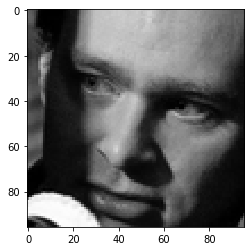

In [13]:
# sample of image in our dataset

i  = np.random.randint(1,len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i],cmap='gray')

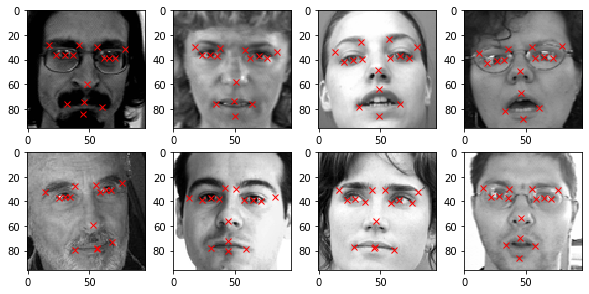

In [14]:
# taking a visual on the key points on the images of face from the dataset

fig = plt.figure(figsize=(10,10))

for count in range(8):
    i = np.random.randint(1,len(facialpoints_df))
    ax = fig.add_subplot(4,4,count+1)
    image = plt.imshow(facialpoints_df['Image'][i],cmap = 'gray')


    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j],'rx')

# Image augmentation

In [15]:
import copy
facialpoints_df_y_flip = copy.copy(facialpoints_df)

In [16]:
columns = facialpoints_df_y_flip.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [17]:
# flipping the images about y axis

facialpoints_df_y_flip['Image'] = facialpoints_df_y_flip['Image'].apply(lambda x: np.flip(x ,axis = 1))

In [18]:
# flipping the key_points for the flipped images

for i in range(len(columns)):
    if i%2==0:
        facialpoints_df_y_flip[columns[i]] = facialpoints_df_y_flip[columns[i]].apply(lambda x: 96. -float(x))

 Sample of the flipped images with their corresponding key_points


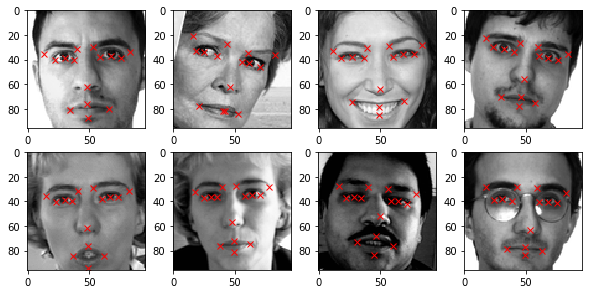

In [19]:

fig = plt.figure(figsize=(10,10))

for count in range(8):
    i = np.random.randint(1,len(facialpoints_df_y_flip))
    ax = fig.add_subplot(4,4,count+1)
    image = plt.imshow(facialpoints_df_y_flip['Image'][i],cmap = 'gray')


    for j in range(1,31,2):
        plt.plot(facialpoints_df_y_flip.loc[i][j-1], facialpoints_df_y_flip.loc[i][j],'rx')

In [20]:
facialpoints_df_y_flip.to_pickle('y_flip.pkl')
del facialpoints_df_y_flip

In [27]:
# flipping the images about x axis

facialpoints_df_x_flip = copy.copy(facialpoints_df)
facialpoints_df_x_flip['Image'] = facialpoints_df_x_flip['Image'].apply(lambda x: np.flip(x ,axis = 0))

In [28]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [29]:
facialpoints_df_x_flip['Image'][0]

array([[191, 184, 184, ...,  70,  75,  90],
       [189, 188, 207, ...,  61,  69,  78],
       [186, 183, 181, ...,  52,  57,  60],
       ...,
       [237, 236, 237, ..., 251, 251, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [238, 236, 237, ..., 250, 250, 250]])

In [30]:
# flipping the key_points for the flipped images

for i in range(len(columns)):
    if i%2!=0:
        facialpoints_df_x_flip[columns[i]] = facialpoints_df_x_flip[columns[i]].apply(lambda x: 96. -float(x))

Sample of the x flipped images with their corresponding key_points

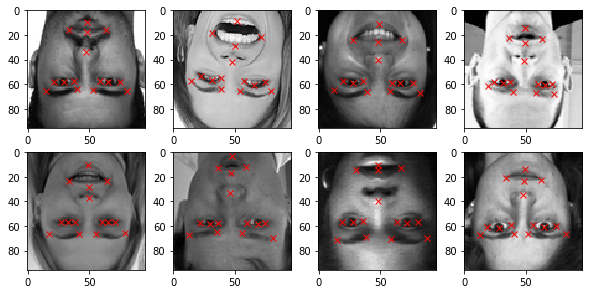

In [32]:
fig = plt.figure(figsize=(10,10))

for count in range(8):
    i = np.random.randint(1,len(facialpoints_df_x_flip))
    ax = fig.add_subplot(4,4,count+1)
    image = plt.imshow(facialpoints_df_x_flip['Image'][i],cmap = 'gray')


    for j in range(1,31,2):
        plt.plot(facialpoints_df_x_flip.loc[i][j-1], facialpoints_df_x_flip.loc[i][j],'rx')

In [33]:
facialpoints_df_x_flip.to_pickle('x_flip.pkl')
facialpoints_df_xy_flip = copy.copy(facialpoints_df_x_flip)
del facialpoints_df_x_flip

In [34]:
# flipping the images about y and x axis

facialpoints_df_xy_flip['Image'] = facialpoints_df_xy_flip['Image'].apply(lambda x: np.flip(x ,axis = 1))

In [35]:
# flipping the key_points for the flipped images

for i in range(len(columns)):
    if i%2==0:
        facialpoints_df_xy_flip[columns[i]] = facialpoints_df_xy_flip[columns[i]].apply(lambda x: 96. -float(x))

Sample of the xy flipped images with their corresponding key_points

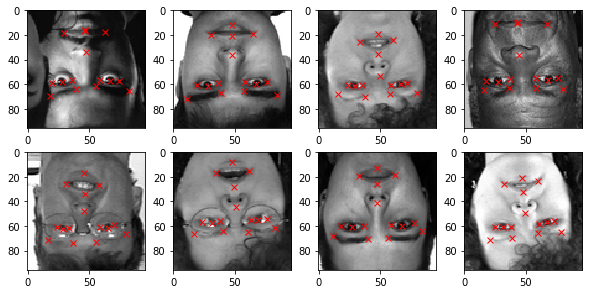

In [36]:
fig = plt.figure(figsize=(10,10))

for count in range(8):
    i = np.random.randint(1,len(facialpoints_df_xy_flip))
    ax = fig.add_subplot(4,4,count+1)
    image = plt.imshow(facialpoints_df_xy_flip['Image'][i],cmap = 'gray')


    for j in range(1,31,2):
        plt.plot(facialpoints_df_xy_flip.loc[i][j-1], facialpoints_df_xy_flip.loc[i][j],'rx')

In [37]:
facialpoints_df_xy_flip.to_pickle('xy_flip.pkl')
del facialpoints_df_xy_flip

Concatenating all this flipped data in facialpoints_df_augmented

In [38]:
facialpoints_df_augmented = pd.concat([facialpoints_df,pd.read_pickle('x_flip.pkl')],ignore_index = True)
facialpoints_df_augmented = pd.concat([facialpoints_df_augmented,pd.read_pickle('y_flip.pkl')],ignore_index = True)
facialpoints_df_augmented = pd.concat([facialpoints_df_augmented,pd.read_pickle('xy_flip.pkl')],ignore_index = True)

In [39]:
facialpoints_df_augmented.shape

(8560, 31)

Image augmentation by shanging the contrast of the images

In [40]:
import random
facialpoints_df_copy = copy.copy(facialpoints_df_augmented)

facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1,2)*x,0.0,255.0))
facialpoints_df_augmented = pd.concat([facialpoints_df_augmented,facialpoints_df_copy],ignore_index = True)
facialpoints_df_augmented.shape


(17120, 31)

In [41]:
facialpoints_df_copy.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,...,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000
mean,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
std,18.341770,11.391668,18.475027,11.162644,11.449754,10.346507,25.557104,10.702433,11.542345,10.278025,...,3.275829,10.302742,15.845961,28.240155,15.457256,28.456198,2.724011,25.205525,3.035549,34.965237
min,17.986918,23.832996,18.922611,24.773072,26.976970,27.190098,8.967748,26.250023,24.112624,26.250023,...,24.472590,20.007269,11.232877,1.326363,9.778137,2.556824,32.260312,2.083662,33.047605,0.191017
25%,29.871304,36.913595,29.656191,37.048126,36.672852,37.845590,22.760341,37.626594,36.620868,37.920503,...,46.592401,38.366482,32.801271,20.318273,33.035979,20.058035,46.637398,23.605466,46.468306,13.611605
50%,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
75%,66.128696,59.086405,66.343809,58.951874,59.327148,58.154410,73.239659,58.373406,59.379132,58.079497,...,49.407599,57.633518,63.198729,75.681727,62.964021,75.941965,49.362602,72.394534,49.531694,82.388395
max,78.013082,72.167004,77.077389,71.226928,69.023030,68.809902,87.032252,69.749977,71.887376,69.749977,...,71.527410,75.992731,84.767123,94.673637,86.221863,93.443176,63.739688,93.916338,62.952395,95.808983


Here is the sample from the augmented data

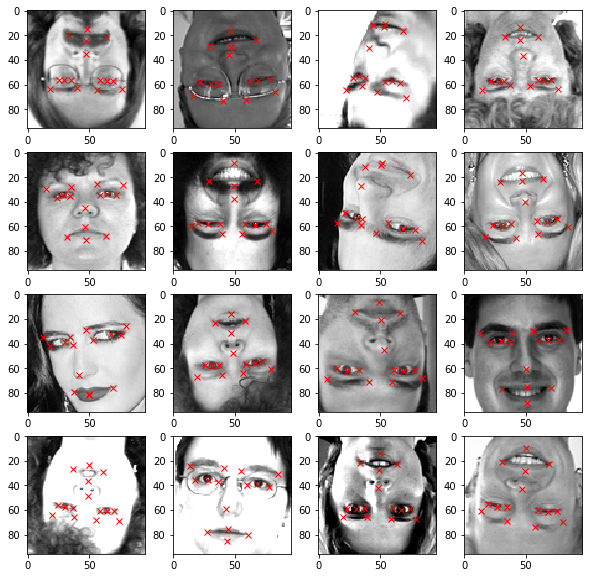

In [42]:
fig = plt.figure(figsize=(10,10))

for count in range(16):
    i = np.random.randint(1,len(facialpoints_df_augmented))
    ax = fig.add_subplot(4,4,count+1)
    image = plt.imshow(facialpoints_df_augmented['Image'][i],cmap = 'gray')


    for j in range(1,31,2):
        plt.plot(facialpoints_df_augmented.loc[i][j-1], facialpoints_df_augmented.loc[i][j],'rx')

In [43]:
facialpoints_df_augmented.shape

(17120, 31)

In [44]:
img = np.array(facialpoints_df_augmented.iloc[:,30])
img = img/255

X = np.empty((len(img),96,96,1))

# converting all images into array and stacking them
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i],axis=2)

X = np.asarray(X).astype(np.float32)
X.shape

(17120, 96, 96, 1)

In [ ]:
# retrieving all the facial key points

y = facialpoints_df_augmented.iloc[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

Splitting the data in test and train data

In [46]:
x_train , X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.1)

# RNN

In [ ]:
We will be using a recurrent neural network for this project

<img src="reference images/rnn.png" width=800 /> ![](reference images/rnn.png)

In [47]:
def res_block(X , filter,stage):

    X_copy = X
    f1, f2, f3 = filter
    X = Conv2D(f1 ,(1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_a',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2 ,kernel_size = (3,3), strides = (1,1), name = 'res_'+str(stage)+'_conv_b',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3 ,kernel_size =(1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_c',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_conv_c')(X)
    

    X_copy = Conv2D(f3 ,kernel_size =(1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_copy',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_conv_copy')(X_copy)
    

    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    
    X_copy = X

    X = Conv2D(f1 ,(1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_1_a',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2 ,kernel_size =(3,3), strides = (1,1), name = 'res_'+str(stage)+'_identity_1_b',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3 ,kernel_size =(1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_1_c',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_identity_1_c')(X)

    X = Add()([X,X_copy])
    X = Activation('relu')(X)


    X_copy = X

    X = Conv2D(f1 ,(1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_a',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2 ,(3,3), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_b',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3 ,(1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_c',kernel_initializer = glorot_uniform(seed =0),padding = 'same')(X)
    X = BatchNormalization(axis = 3,name ='bn_'+str(stage)+'_identity_2_c')(X)

    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X

In [48]:
input_shape = (96,96,1)

X_input = Input(input_shape)

X = ZeroPadding2D((3,3))(X_input)

X = Conv2D(64 ,(7,7),strides = (2,2) ,name = 'conv1',kernel_initializer = glorot_uniform(seed =0))(X)
X = BatchNormalization(axis=3 , name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPool2D((3,3),strides = (2,2))(X)

X = res_block(X,filter= [64,64,256],stage = 2)

X = res_block(X ,filter=[128,128,512],stage = 3)

# X = res_block(X ,filter=[256,256,1024],stage = 4)

X = AveragePooling2D((2,2),name = 'Average_pooling')(X)

X = Flatten()(X)
X = Dense(4096 ,activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048 ,activation = 'relu')(X)
X = Dropout(0.1)(X)
X =Dense(30 ,activation = 'relu')(X)

model = Model(inputs = X_input,outputs = X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

In [49]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [50]:
# defining the loss , optimizer and metrice for our model

adam = tf.keras.optimizers.Adam(lr = 0.001,beta_1= 0.9 ,beta_2= 0.999 ,amsgrad=False)
model.compile(loss='mean_squared_error',optimizer =adam ,metrics=['accuracy'])
EPOCHS=100

learning rate schedular 

Learning rate schedule: 1e-05 to 5e-05 to 1e-05


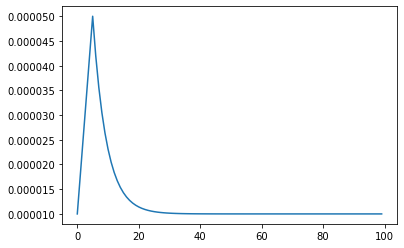

In [51]:
def build_lrfn(lr_start=0.00001, lr_max=0.00005, 
               lr_min=0.00001, lr_rampup_epochs=5, 
               lr_sustain_epochs=0, lr_exp_decay=.8):
    lr_max = lr_max * strategy.num_replicas_in_sync

    def lrfn(epoch):
        if epoch < lr_rampup_epochs:
            lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
        elif epoch < lr_rampup_epochs + lr_sustain_epochs:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) *\
                 lr_exp_decay**(epoch - lr_rampup_epochs\
                                - lr_sustain_epochs) + lr_min
        return lr
    return lrfn

lrfn = build_lrfn()
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)
rng = [i for i in range(25 if EPOCHS<25 else EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [55]:
# setting a checkpoint for our progress

AUTO = tf.data.experimental.AUTOTUNE
checkpointer = ModelCheckpoint(filepath='weights.hdf5',verbose=1,save_best_only=True)

In [56]:
len(x_train)

15408

# Training the model

In [57]:
history = model.fit(x_train,y_train,batch_size=16,epochs=100 ,validation_split=0.05,callbacks=[checkpointer,lr_schedule])


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/100
913/915 [============================>.] - ETA: 0s - loss: 169.7337 - accuracy: 0.4665
Epoch 00001: val_loss improved from inf to 99.60843, saving model to weights.hdf5
915/915 [==============================] - 21s 23ms/step - loss: 169.6646 - accuracy: 0.4663 - val_loss: 99.6084 - val_accuracy: 0.5227 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler reducing learning rate to 1.8000000000000004e-05.
Epoch 2/100
913/915 [============================>.] - ETA: 0s - loss: 93.4295 - accuracy: 0.5123- ETA: 1s - loss
Epoch 00002: val_loss improved from 99.60843 to 92.93238, saving model to weights.hdf5
915/915 [==============================] - 21s 23ms/step - loss: 93.4093 - accuracy: 0.5124 - val_loss: 92.9324 - val_accuracy: 0.5409 - lr: 1.8000e-05

Epoch 00003: LearningRateScheduler reducing learning rate to 2.6000000000000002e-05.
Epoch 3/100
913/915 [============================>.] - ETA: 0s - loss: 7

913/915 [============================>.] - ETA: 0s - loss: 6.5637 - accuracy: 0.8559
Epoch 00042: val_loss did not improve from 51.80928
915/915 [==============================] - 21s 23ms/step - loss: 6.5635 - accuracy: 0.8560 - val_loss: 56.3907 - val_accuracy: 0.7821 - lr: 1.0013e-05

Epoch 00043: LearningRateScheduler reducing learning rate to 1.0010384593717071e-05.
Epoch 43/100
913/915 [============================>.] - ETA: 0s - loss: 6.4629 - accuracy: 0.8560
Epoch 00043: val_loss did not improve from 51.80928
915/915 [==============================] - 21s 23ms/step - loss: 6.4633 - accuracy: 0.8561 - val_loss: 55.2198 - val_accuracy: 0.7912 - lr: 1.0010e-05

Epoch 00044: LearningRateScheduler reducing learning rate to 1.0008307674973657e-05.
Epoch 44/100
913/915 [============================>.] - ETA: 0s - loss: 6.5257 - accuracy: 0.8577
Epoch 00044: val_loss improved from 51.80928 to 51.45177, saving model to weights.hdf5
915/915 [==============================] - 22s 24ms/st

915/915 [==============================] - ETA: 0s - loss: 5.5365 - accuracy: 0.8650
Epoch 00063: val_loss improved from 48.24535 to 44.43946, saving model to weights.hdf5
915/915 [==============================] - 21s 23ms/step - loss: 5.5365 - accuracy: 0.8650 - val_loss: 44.4395 - val_accuracy: 0.8003 - lr: 1.0000e-05

Epoch 00064: LearningRateScheduler reducing learning rate to 1.0000095780971305e-05.
Epoch 64/100
915/915 [==============================] - ETA: 0s - loss: 5.4789 - accuracy: 0.8664
Epoch 00064: val_loss did not improve from 44.43946
915/915 [==============================] - 20s 22ms/step - loss: 5.4789 - accuracy: 0.8664 - val_loss: 45.9288 - val_accuracy: 0.7977 - lr: 1.0000e-05

Epoch 00065: LearningRateScheduler reducing learning rate to 1.0000076624777044e-05.
Epoch 65/100
913/915 [============================>.] - ETA: 0s - loss: 5.5878 - accuracy: 0.8659
Epoch 00065: val_loss did not improve from 44.43946
915/915 [==============================] - 21s 22ms/st

Saving the architechture of our model in .json file

In [58]:
model_json = model.to_json()

with open('KeyPointDetector.json','w') as json_file:

    json_file.write(model_json)

Loading the Trained model

In [59]:
with open('KeyPointDetector.json','r') as json_file:

    json_SavedModel = json_file.read()
model = tf.keras.models.model_from_json(json_SavedModel)
model.load_weights('weights.hdf5')
model.compile(loss='mean_squared_error',optimizer =adam ,metrics=['accuracy'])

Evaluate the model

In [60]:
result = model.evaluate(X_test,y_test)

54/54 [==============================] - 1s 9ms/step - loss: 49.2655 - accuracy: 0.8008


# Inference made by model

In [61]:
df_predict = model.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [63]:
rms = sqrt(mean_squared_error(y_test,df_predict))
print('RMS value : {}'.format(rms))

RMS value : 7.018938874907481


In [64]:
df_predict = pd.DataFrame(df_predict,columns = columns)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,27.797808,57.311623,69.213341,56.138550,36.792984,56.029026,18.457653,56.173389,60.406448,55.232635,...,49.253151,32.837238,29.918886,10.487172,65.153458,9.518056,48.291565,13.142762,47.529202,4.918057
1,30.113487,58.607803,66.662239,57.906494,36.311100,57.895119,23.672400,57.970928,60.199448,57.725857,...,47.930584,42.772552,31.995876,21.135395,61.614986,20.972675,47.129982,28.226217,46.966076,12.474996
2,30.921432,36.721554,70.406006,36.904518,37.368458,37.432037,23.696533,37.626190,64.138176,37.034306,...,53.165504,61.398911,35.529720,76.140968,63.990967,75.766037,51.048714,71.787994,50.536518,84.521263
3,66.066589,58.639687,28.476234,57.716320,57.792297,57.343044,75.020081,57.738857,37.514778,57.018082,...,46.326645,35.528561,66.734695,21.911539,29.633921,21.279716,47.479507,23.135181,47.639019,13.141078
4,69.367249,37.101139,28.144127,37.548435,60.797401,38.019974,77.820297,38.199299,36.670887,37.904419,...,50.806046,58.314877,67.909729,80.046822,29.865999,79.882721,49.491474,77.347542,49.562775,88.150063


sample Predictions made by our trained model

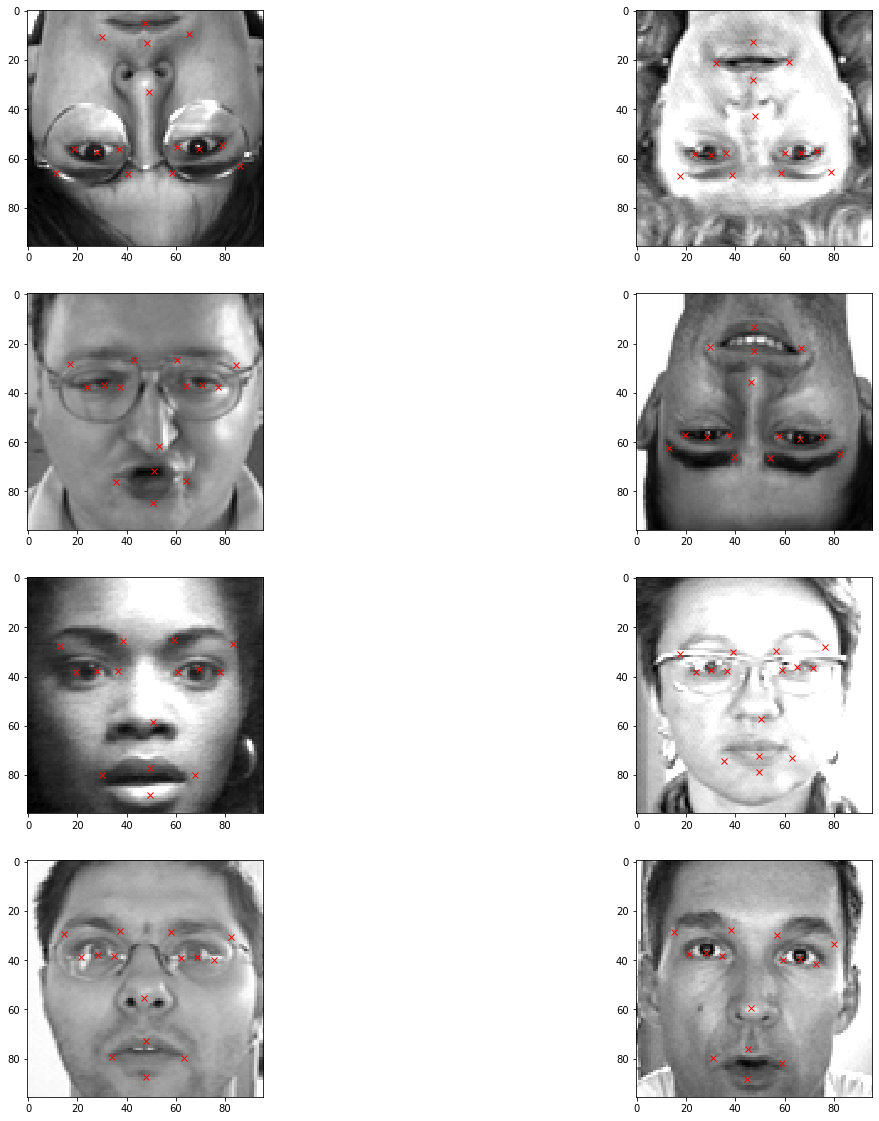

In [65]:
fig = plt.figure(figsize=(20,20))

for i in range(8):
    ax = fig.add_subplot(4,2,i+1)

    plt.imshow(X_test[i].squeeze(),cmap='gray')

    for j in range(1,31,2):
        plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j],'rx')